In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pandas as pd
from scipy.spatial import distance_matrix
import isomap as imp


In [2]:
#create data
def cos(x):
    r1 = np.random.uniform(0,0.75)
    erg = np.cos(x)+r1
    return erg
x1 = np.random.uniform(-1.5,3,30)
x2 = np.random.uniform(4.5,8,30)
x3 = np.random.uniform(9.5,11.5,30)
x = np.concatenate((x1,x2,x3),axis=None)
data = np.array([[i,cos(i)] for i in x])

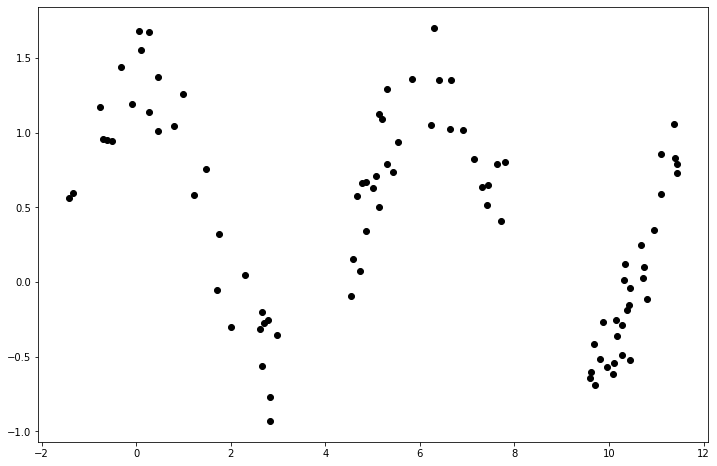

In [3]:
plt.scatter(data[:,0],data[:,1],color='black')
plt.show()

In [4]:
#compute distance matrix with sklearn and the according k nearest neighbours matrix.
k = 8
d_matrix = distance_matrix(data,data)
knn_d = imp.knn_dist(d_matrix, k)

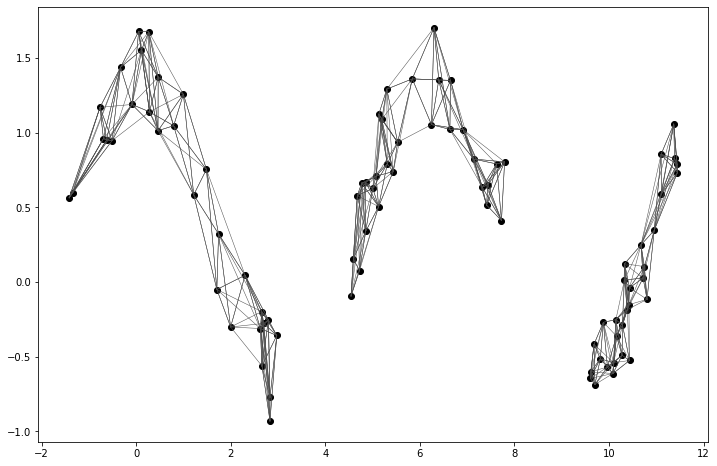

In [5]:
#plot the responding graph obtained by just using k nearest neighbours with euclidean distance
n,n = knn_d.shape
plt.scatter(data[:,0],data[:,1],color='black')
for i,row in enumerate(knn_d):
    d1 = data[i]
    for j in np.nonzero(row)[0]:
        d2 = data[j]
        plt.plot([d1[0],d2[0]],[d1[1],d2[1]], color='0.3',linewidth=0.5)
plt.show()

In [6]:
#compute the components and member labels of the above graph, which is used to create the connected knn matrix
n_components, labels = imp.check_components(knn_d)
tuned_knn = imp.tuned_knn(d_matrix, n_components, labels, knn_d)

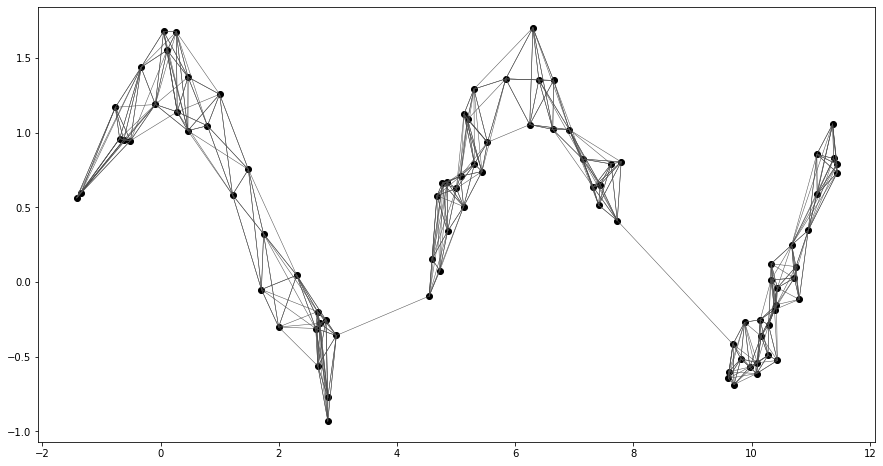

In [7]:
#plot the graph according to tuned_knn with the connected components
plt.rcParams["figure.figsize"] = (15,8)
n,n = tuned_knn.shape
plt.scatter(data[:,0],data[:,1],color='black')
for i,row in enumerate(tuned_knn):
    for j in np.nonzero(row)[0]:
        d1 = data[i]
        d2 = data[j]
        plt.plot([d1[0],d2[0]],[d1[1],d2[1]], color='0.3',linewidth=0.5)
plt.show()



